In [1]:
# Dataset can be accessed using (below) however, I have downloaded my dataset and will be using that.

#from datasets import load_dataset
#dataset = load_dataset("knkarthick/dialogsum")

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train_data  = pd.read_csv("/Users/praggyaverma/Desktop/ML-Models/Text Summarizer Model/dataset/train.csv")
validation_data = pd.read_csv("/Users/praggyaverma/Desktop/ML-Models/Text Summarizer Model/dataset/validation.csv")
test_data = pd.read_csv("/Users/praggyaverma/Desktop/ML-Models/Text Summarizer Model/dataset/test.csv")

In [13]:
train_data.shape

(12460, 4)

In [14]:
validation_data.shape

(500, 4)

In [15]:
test_data.shape

(1500, 4)

In [16]:
train_data.head()

,id,dialogue,summary,topic
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",get a check-up
1,train_1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,vaccines
2,train_2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,find keys
3,train_3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,have a girlfriend
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,dance


In [18]:
train_data["dialogue"][4]

"#Person1#: Watsup, ladies! Y'll looking'fine tonight. May I have this dance?\n#Person2#: He's cute! He looks like Tiger Woods! But, I can't dance. . .\n#Person1#: It's all good. I'll show you all the right moves. My name's Malik.\n#Person2#: Nice to meet you. I'm Wen, and this is Nikki.\n#Person1#: How you feeling', vista? Mind if I take your friend'round the dance floor?\n#Person2#: She doesn't mind if you don't mind getting your feet stepped on.\n#Person1#: Right. Cool! Let's go!"

In [20]:
train_data.info

<bound method DataFrame.info of                 id                                           dialogue  \
0          train_0  #Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...   
1          train_1  #Person1#: Hello Mrs. Parker, how have you bee...   
2          train_2  #Person1#: Excuse me, did you see a set of key...   
3          train_3  #Person1#: Why didn't you tell me you had a gi...   
4          train_4  #Person1#: Watsup, ladies! Y'll looking'fine t...   
...            ...                                                ...   
12455  train_12455  #Person1#: Excuse me. You are Mr. Green from M...   
12456  train_12456  #Person1#: Mister Ewing said we should show up...   
12457  train_12457  #Person1#: How can I help you today?\n#Person2...   
12458  train_12458  #Person1#: You look a bit unhappy today. What'...   
12459  train_12459  #Person1#: Mom, I'm flying to visit uncle Lee'...   

                                                 summary              topic  
0      Mr. Sm

In [24]:
train_data.isnull().sum()

id          0
dialogue    0
summary     0
topic       0
dtype: int64

There are no null values in this dataset.

In [ ]:
train_data['dialogue_length'] = train_data['dialogue'].apply(lambda x: len(x.split()))

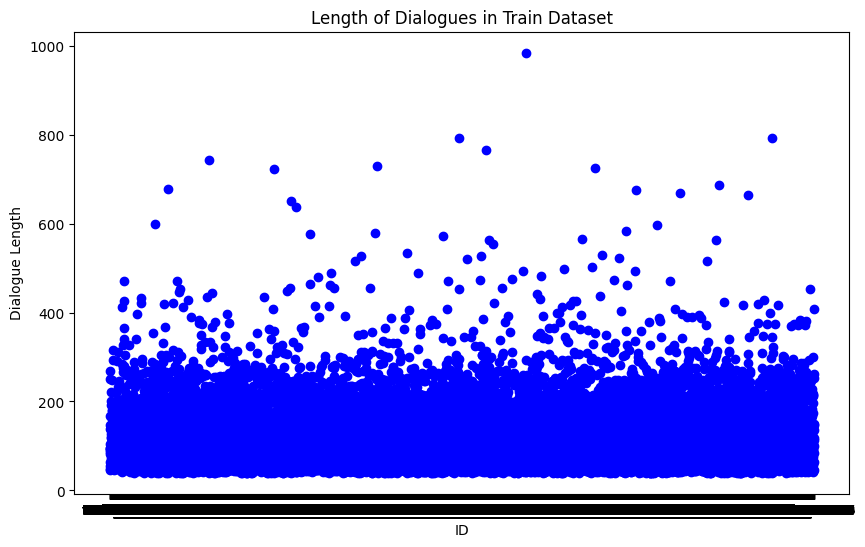

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['id'], train_data['dialogue_length'], color='blue')
plt.xlabel('ID')
plt.ylabel('Dialogue Length')
plt.title('Length of Dialogues in Train Dataset')
plt.show()

As we can see in the above graph, the dialogue lengths are mostly below 400 length with a few exceptions.

In [29]:
train_data['summary_length'] = train_data['summary'].apply(lambda x: len(x.split()))

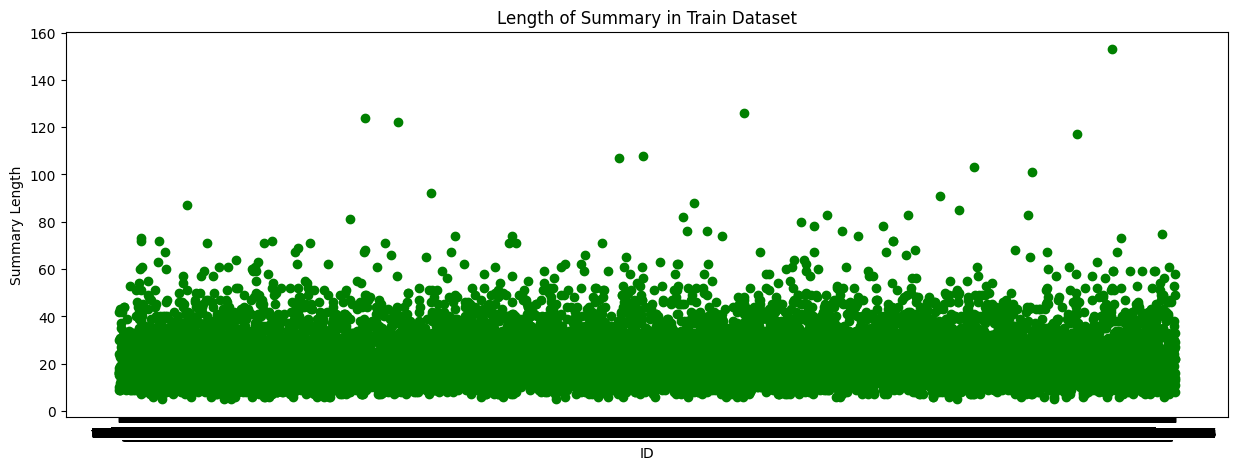

In [30]:
plt.figure(figsize=(15, 5))
plt.scatter(train_data['id'], train_data['summary_length'], color='green')
plt.xlabel('ID')
plt.ylabel('Summary Length')
plt.title('Length of Summary in Train Dataset')
plt.show()

In [31]:
meanDialogueLength = train_data["dialogue_length"].mean()
meanDialogueLength

130.98699839486358

In [32]:
meanSummaryLength = train_data["summary_length"].mean()
meanSummaryLength

22.867656500802568

In [35]:
print("Text summary is reduced by", round((meanDialogueLength-meanSummaryLength)/meanDialogueLength*100, 3),"%")

Text summary is reduced by 82.542 %


For text summarizer we will take a look at BART (Bidirectional and Auto-Regressive Transformers) introduced by Lewis et al.

In [ ]:
#if not already downloaded then run
#pip install transformers

In [40]:
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import pipeline

In [41]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [1]:
ARTICLE = train_data["dialogue"][0]
print(summarizer(ARTICLE, max_length=30, min_length=20, do_sample=False))

NameError: name 'train_data' is not defined